In [1]:
# my imports
from random import shuffle
import matplotlib.pyplot as plt 

## Maximizing mutual benefit through the long-term implementation of Nash Equilibrium strategies in Non-Zero-Sum Competitive Games

### Abstract:
The aim of this project is to explore the applicability and effectiveness of the Nash Equilibrium concept in long-term iterations of finite two-player non-zero-sum competitive games such as the Prisoner's Dilemma, Deadlock, and Battle of the Sexes. By analyzing various game scenarios and implementing Nash equilibrium strategies, the project seeks to demonstrate that the mutual benefits (combined payoff) of equilibrium outcomes are superior to those of purely competitive strategies or best-outcome actions in long-term finite competitive interactions. This project will not cover cooperative scenarios or multi-level stochastic (Markov) games, as these have been extensively examined in previous works.

### 1. Introduction to Game Theory:
#### What is Game Theory?
Game theory is a branch of applied mathematics that analyzes situations where players make interdependent decisions. Each player considers the possible strategies of others when forming their own strategy. A game solution outlines the optimal decisions for players with similar, opposing, or mixed interests and the resulting outcomes (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>
Game theory was developed by mathematician John von Neumann and economist Oskar Morgenstern to address economic problems. In their 1944 book, "The Theory of Games and Economic Behavior," they argued that the mathematics used in physical sciences, which describes an unbiased nature, was not suitable for modeling economics (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>
In the 1950s, American mathematician John Nash further developed game theory. He established its mathematical principles, focusing on the rivalries between competitors with mixed interests (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>
Game theory classifications include the number of players, the information available to players, the goal extent (zero-sum or non-zero-sum), the game duration (discrete or continuous), the levels of cooperation, and whether the game is sequential or simultaneous, and symmetric or asymmetric. The most obvious classification feature is the number of players. Games can be one-person, two-person, or n-person (where n is greater than two), each with unique characteristics. Additionally, a player can represent an individual, a nation, a corporation, or a team of individuals with shared interests (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). In games of perfect information, such as chess, each player has complete knowledge of the game's state at all times. In contrast, poker is a game of imperfect information because players do not know their opponents' cards (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>
Games can also be classified based on the alignment of players' goals. Constant-sum or zero-sum games are purely competitive, such as poker, where the total wealth remains constant but shifts among players. In these games, players' interests are entirely opposed. Variable-sum or non-zero-sum games, such as labor-management disputes, involve both conflict and potential mutual benefit. These games can be cooperative, where players can make binding agreements, or noncooperative, where agreements are not enforceable. For example, negotiating a car price involves noncooperative bargaining until a contract is signed, making it cooperative. Auctions are noncooperative as bidders act independently (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). This paper focuses on non-zero-sum competitive games with a finite number of players (two), such as the Prisoner's Dilemma,  Deadlock, and Battle of the Sexes. However, the analysis in the conclusion covers a broader perspective. <br><br>
In terms of continuation, a game is finite (descrete) when it has a finite number of players, each with a finite number of options, and the game cannot continue indefinitely. Examples include chess, checkers, poker, and most parlor games. While infinite (continuous) games, involving more complexity and subtlety, will be briefly mentioned, this paper primarily focuses on finite games. Infinite games revolve around aspects of life such as economics, politics, and war, but they are not deeply explored here (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>
A symmetric game is one where each player earns the same payoff for making the same choice, meaning the game's outcome doesn't change based on the player's identity. In these games, the strategic situation is identical for all players. Many well-known 2×2 games, such as the Prisoner's Dilemma, Chicken, and the Stag Hunt, are symmetric games. This paper covers some of these symmetric games and provides an example of a symmetric game with variable payoffs.<br><br>
Another possible classification focuses on the type of payoff received by the players, whether positive or negative. In the case of the Prisoner's Dilemma, the payoff is negative, represented by the number of years of conviction, prompting players to aim to minimize their payoff. An alternative is the positive payoff game, such as the Battle of the Sexes, where each player aims to maximize their gain. Examples of positive payoff games include most sports games, board games, etc.  <br><br>

#### Significance and practical applications of Game Theory.
Game theory studies mathematical models of strategic interactions among rational agents and finds wide applications in economics, social sciences, logic, systems science, and computer science. Initially focused on two-person zero-sum games, where one participant's gain is another's loss, it expanded in the 1950s to include non-zero-sum games. Today, it encompasses rational decision-making in humans, animals, and computers. <br><br>
Game theory has been instrumental in predicting the formation of political coalitions and business conglomerates, determining optimal pricing in competitive markets, assessing voter or voting bloc power, selecting jury members, choosing manufacturing plant locations, and understanding the behavior of animals and plants in survival scenarios (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>
The significance of Game theory over the years is evidenced by the number of game theorists who have received the Nobel Prize. Notable laureates include John C. Harsanyi, John F. Nash Jr., and Reinhard Selten (1994), recognized 'for their pioneering analysis of equilibria in the theory of non-cooperative games'. Robert J. Aumann and Thomas C. Schelling (2005) were honored 'for having enhanced our understanding of conflict and cooperation through game-theory analysis'. Leonid Hurwicz, Eric S. Maskin, and Roger B. Myerson (2007) received the Nobel Prize 'for having laid the foundations of mechanism design theory,' among others (The Nobel Price, 2024; Nobel price winners in economic sciense 1901-2023).<br><br>

### 2. Introduction to Nash Equilibrium:
#### Overview of Nash equilibrium as a solution concept in game theory and previous research.
In 1994, the Nobel Prize in Economics was awarded to John F. Nash for his groundbreaking contributions to the development of mutually beneficial strategies in two-person variable-sum games, which he termed 'Nash Equilibrium' or 'Nash Equilibria'. Nash demonstrated that in such games, characterized by a set of possible outcomes and associated utilities for each player, there exists a unique outcome satisfying four conditions:

1. **Utility Independence:** The outcome remains unchanged regardless of the specific utility function assigned. Preferences between outcomes remain consistent irrespective of utility values;
2. **Pareto-Optimality:** No other outcome exists that would simultaneously improve the outcomes of all players. It represents the most favorable outcome for all involved;
3. **Irrelevance of Alternatives:** The outcome is unaffected by the addition or removal of unattractive options from the list of alternatives;
4. **Symmetry:**  The solution is invariant to the identities of the players. If players swap roles, the solution stays the same, except their payoffs are reversed (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>

In a Nash equilibrium, if each player has chosen a strategy and no one can increase their expected payoff by changing their strategy while the others keep theirs unchanged, the current set of strategy choices is a Nash equilibrium. For instance, if Anna and Peter choose strategies A and B, (A, B) is a Nash equilibrium if Anna cannot improve her payoff by changing from A, given Peter's choice of B, and vice versa. Nash demonstrated that every finite game has a Nash equilibrium, possibly involving mixed strategies. <br><br>
#### Nash Equilibrium's relevance in competitive environments and its implications in the process of strategic decision-making.
In game theory, a Nash equilibrium is an outcome in a noncooperative game where no player can improve their expected outcome by changing their own strategy. This concept defines the solution for N-player noncooperative games. The Nash equilibrium is a key concept in understanding strategic interactions (Encyclopædia Britannica, Inc. Corporate Site.,2024; Nash equilibrium). The Nash equilibrium strategy finds applications in numerous fields with non-zero outcomes, including economics, politics, warfare, and more. In every situation where one party cannot improve its payoff by changing their strategy alone, a Nash equilibrium can be found.<br><br>


### 3. Characteristics of Non-Zero-Sum Games:
#### Definition and characteristics of non-zero sum games.
Most practical games are variable-sum or non-zero-sum games, where players have both common and opposing interests. For example, in a transaction between a buyer and a seller, the buyer seeks a low price while the seller aims for a high price, yet both parties want to complete the transaction successfully. Similarly, two hostile nations may disagree on various issues but share a common interest in avoiding war. Unlike constant-sum or zero-sum games, where both players cannot gain if deprived of strategies, variable-sum games allow for mutual gain even with reduced strategies. For instance, in regions with high unemployment, a worker might accept a lower salary to secure a job, while a minimum wage law might compel the employer to offer a higher salary (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>
#### Distinction from zero-sum games and implications for strategic interactions.
In contrast to non-zero-sum games, zero-sum games or constant-sum games, such as poker, maintain a constant total wealth that shifts among players, making them purely competitive. Non-zero-sum games, like labor-management disputes, involve both conflict and potential mutual benefit. These games can be cooperative, allowing players to make binding agreements, or noncooperative, where agreements are not enforceable. For instance, negotiating a car price involves noncooperative bargaining until a contract is signed, rendering it cooperative. Auctions are noncooperative, as bidders act independently (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). This paper focuses on non-zero-sum concurrent games.

### 4. Mutual Benefits in Non-Zero-Sum Games:
#### How Nash equilibrium strategies can lead to mutually beneficial outcomes in non-zero sum games.
Formally, a game consists of a collection of topological spaces $ (X_i) $ indexed by $ i \in I $, where $ I $ is some index set. Each $ X_i $ represents the set of possible actions for player $i$. The set of all possible outcomes is: $$ X = \prod_{i \in I} X_i, $$ with $ X $ having the product topology. Player $i$'s utility over outcomes is defined by a continuous function $ u_i: X \to \mathbb{R} $. We assume each $ X_i $ is compact and connected, making $ X $ also compact and connected.

We use $-i$ to denote "all players other than $ i $", so the set for all other players' actions is: $$ X_{-i} = \prod_{\substack{j \in I \\ j \ne i}} X_j $$ Any point in $ X_{-i} $ is denoted as $ x_{-i} $.

Player $i$'s best-response set, $ \text{BR}_i(x_{-i}) $, is the set of actions in $ X_i $ that maximize $ u_i $ given $ x_{-i} $:

$$ \text{BR}_i(x_{-i}) = \{ x_i \in X_i : u_i(x_i, x_{-i}) = \sup_{y \in X_i} u_i(y, x_{-i}) \} $$

A point $ x \in X $ is a pure-strategy Nash equilibrium if each player $i$'s action $ x_i $ is in their best-response set $ \text{BR}_i(x_{-i}), $ and we will denote as $NE_i(x_{-i})$ (Conrad Kosowsky, 2023; Nash Equilibrium Existence without Convexity).


#### Scenarios where cooperation among rational agents yields superior outcomes compared to purely competitive strategies.
In competitive non-zero-sum games, three distinguished strategies can be differentiated:
1. **Best Response / Best Outcome strategy**: Each player chooses the outcome that will provide the best available payoff, regardless of the other player(s)' decision in a given interaction.
2. **Cooperative strategy**: Players cooperate and make their decisions based on the best Common Payoff, disregarding their own personal benefit. This scenario is out of scope for this work, as it excludes competitive behavior.
3. **Nash Equilibrium strategy**: Each player makes their choice based on the best possible outcome, given the knowledge that their competitor will act in their best interest.<br>

Given the above mathematical framework, we can establish the two main strategies and their positive or negative common payoff:<br><br>
Best Response / Best Outcome Common Payoff:
$$ \text{CP}_{BR} = \sum_{i \in I} u_i(BR_i(x_{-i})), $$
Nash Equilibrium Common Payoff:
$$ \text{CP}_{NE} = \sum_{i \in I} u_i(NE_i(x_{-i})) $$
The goal of this project is to demonstrate that in continuous iterations of finite non-zero-sum competitive games, the sum of all Nash Equilibrium payoffs is greater than or equal to the sum of the common payoffs resulting from the Best Response strategy:
$$ \sum_{i=1}^{n} \text{CP}_{NE}i \geq \sum_{i=1}^{n} \text{CP}_{BR}i $$
This represents the sum of Nash Equilibrium Payoffs over 𝑛 compared to the sum of Best Response Common Payoff with n iterations.

### 5. Examples of Non-Zero-Sum Competitive Games:
#### Identification of specific game scenarios of non-zero-sum competitive interactions.
This project aims to investigate the practicality and efficacy of Nash Equilibrium in extended iterations of finite non-zero-sum competitive games such as the Prisoner's Dilemma, Battle of the Sexes, and Deadlock. Through the analysis of various game scenarios and the application of Nash equilibrium strategies, it seeks to demonstrate that the combined benefits of equilibrium outcomes surpass those of purely competitive strategies or optimal actions in extended competitive interactions.
#### Description of each game scenario and its strategic dynamics.

In the Prisoner's Dilemma, two suspects, A and B, are faced with the decision to confess or remain silent in a robbery case. The outcomes are as follows:

* If both confess, they each receive a five-year sentence;
* If both remain silent, they each get one year for carrying concealed weapons;
* If one confesses and the other remains silent, the confessor goes free while the silent one gets a twenty-year sentence. (Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory). <br><br>

In Deadlock, two rivaling countries' spies need to decide whether to cooperate or defect. In this game:

* Each player does better defecting, regardless of what their partner chooses. (Janet Chen, Su-I Lu, Dan Vekhter, 1999; Game Theory). <br><br>

In the Battle of the Sexes, a classic non-zero-sum game scenario, a couple must decide between attending a ballet or a boxing match for the evening. Both prefer going together over attending alone. Specifically:
* The husband favors the boxing match, but he would still choose the ballet with his wife over going to the match solo;
* Similarly, the wife prefers the ballet but would opt for the boxing match with her husband over attending the ballet alone. (Janet Chen, Su-I Lu, Dan Vekhter, 1999; Game Theory). <br><br>

The payoff matrices are represented in the tables below:

#### Prisoner's dilemma 
|               | B confess | B stay silent |
|---------------|-----------|---------------|
| A confess     | 5, 5      | 0, 20         |
| A stay silent | 20, 0     | 1, 1          |


#### Deadlock 
|            |B Cooperate |B Defect |
|------------|------------|---------|
|A Cooperate | 1, 1       | 0, 3    |
|A Defect    | 3, 0       | 2, 2    |

#### Battle of the sexes

|                |H Boxing Match  | H Ballet|
|----------------|----------------|---------|
|W Boxing Match  | 2, 3           | 1, 1    |
|W Ballet        | 1, 1           | 3, 2    |

### 6. Implementation of Nash Equilibrium Strategies:
#### Methodology for implementing Nash equilibrium strategies in non-zero-sum games.
In the Prisoner's Dilemma, the paradox arises when the Nash Equilibrium is achieved when both parties confess, resulting in a negative payoff of 5 years' sentence each (or a common negative payoff of 10 years). In contrast, the Best Response strategy yields a negative payoff of 0 years for the person who confesses and 20 years for the one who stays silent (or a common negative payoff of 20 years). The cooperation strategy of both parties remaining silent is out of scope for this project, as the objective is to analyze purely competitive strategies. <br><br>
With similar approach, in the other three games, given the expectation that the opposing parties will act in their best interest, we find the Nash equilibrium outcomes at the intersection of the best outcome vectors.

#### Computational techniques and software tools for analyzing equilibrium outcomes.
The goal of this project is to demonstrate that the cumulative common payoff over a finite number of iterations, using the Nash equilibrium strategy in decision making, will surpass any alternative competitive strategy's common payoff (excluding cooperative strategies), with the difference increasing over time. Python language will be utilized, specifically its latest version 3.11, along with the following libraries: Random and Matplotlib. This hypothesis will be tested by simulating one million iterations for the following games:
1. Two-player non-zero-sum game with randomly generated payoffs - the payoff matrix was simulated before each iteration using Python's Random library' Shuffle method;
2. Prisoner's dylemma;
3. Deadlock;
4. Battle of Sexes.

For each game, the simulation consists of the following steps:

1. Finding the best Nash equilibrium (the best one being the one with the higher common payoff) in the current payoff matrix.
2. Determining the common payoff for each Best Response / Best Outcome for each party.
3. Simulating 1,000,000 iterations of the game and plotting the results for NE common payoff, BR A, and BR B common payoff cumulative values over the number of iterations.

These simulations were executed using Visual Studio Code IDE version 1.88.0 on a Windows 10 64-bit operating system computer with the following parameters:

* RAM: 8GB
* Processor: Intel(R) Core(TM) i5-3320M CPU @ 2.60GHz 2.60 GHz
* HDD: 237 GB
* Python 3.11 Kernel.

### 7. Simulation Results:
Presentation of simulation results for the selected game scenarios.
Analysis of equilibrium strategies and outcomes.

In [2]:
# Function used to randomize the numbers for the game matrix
def randomize():
    numbers = list(range(1, 9))
    shuffle(numbers)
    numbers_for_matrix = numbers[0:4]
    return numbers_for_matrix

In [3]:
# Positive payoff Nash equilibrium solver (the more the better) 

def find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b):
    
    #build the game matrix:
    matrix = (numbers_for_a, numbers_for_b)

    # get all possible outcomes as objects {coordinate; value}:
    l_l_a = {'coordinates': (0, 0), 'value': matrix[0][0]} # if b goes left, a goes left value for A
    l_r_a = {'coordinates': (0, 1), 'value': matrix[0][1]} # if b goes left, a goes right value for A
    r_l_a = {'coordinates': (0, 2), 'value': matrix[0][2]} # if b goes right, a goes left value for A
    r_r_a = {'coordinates': (0, 3), 'value': matrix[0][3]} # if b goes right, a goes right value for A
    l_l_b = {'coordinates': (1, 0), 'value': matrix[1][0]} # if a goes left, b goes left value for B
    l_r_b = {'coordinates': (1, 1), 'value': matrix[1][1]} # if a goes left, b goes right value for B
    r_l_b = {'coordinates': (1, 2), 'value': matrix[1][2]} # if a goes right, b goes left value for B
    r_r_b = {'coordinates': (1, 3), 'value': matrix[1][3]} # if a goes right, b goes right value for B

    # find best outcomes for each oposing player decision from type "A goes left - B best outcome":
    find_max_and_index = lambda x, y: (x['value'], x['coordinates'][1]) if x['value'] > y['value'] else (y['value'], y['coordinates'][1])

    b_goes_left_a_best_outcome, b_goes_left_a_best_outcome_index = find_max_and_index(l_l_a, l_r_a)
    b_goes_right_a_best_outcome, b_goes_right_a_best_outcome_index = find_max_and_index(r_l_a, r_r_a)
    a_goes_left_b_best_outcome, a_goes_left_b_best_outcome_index = find_max_and_index(l_l_b, r_l_b)
    a_goes_right_b_best_outcome, a_goes_right_b_best_outcome_index = find_max_and_index(l_r_b, r_r_b)


    # check if Nash Equilibrium exist for the given matrix:
    if b_goes_left_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_left_a_best_outcome_index == a_goes_right_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_right_b_best_outcome_index:
        set_intersection = set([b_goes_left_a_best_outcome_index, b_goes_right_a_best_outcome_index])\
            .intersection(set([a_goes_left_b_best_outcome_index,a_goes_right_b_best_outcome_index]))
        nash_sums = [numbers_for_a[x] + numbers_for_b[x] for x in list(set_intersection)]
        max_of_nash_sums = max(nash_sums)
    else: 
        return 0, 0, 0



    # find and return best Nash Equilibrium, best outcome for A payoff sum and best outcome for B payoff sum:
    max_a = max(numbers_for_a)
    b_for_max_a = numbers_for_b[numbers_for_a.index(max_a)]
    sum_for_max_a = max_a + b_for_max_a
    max_b = max(numbers_for_b)
    a_for_max_b = numbers_for_a[numbers_for_b.index(max_b)]
    sum_for_max_b = max_b + a_for_max_b

    
    return max_of_nash_sums, sum_for_max_a, sum_for_max_b



In [4]:
# Negative payoff Nash equilibrium solver (the less the better) 

def find_negative_payoff_nash_equilibrium(numbers_for_a, numbers_for_b):
    
    #build the game matrix:
    matrix = (numbers_for_a, numbers_for_b)

    # get all possible outcomes as objects {coordinate; value}:
    l_l_a = {'coordinates': (0, 0), 'value': matrix[0][0]} # if b goes left, a goes left value for A
    l_r_a = {'coordinates': (0, 1), 'value': matrix[0][1]} # if b goes left, a goes right value for A
    r_l_a = {'coordinates': (0, 2), 'value': matrix[0][2]} # if b goes right, a goes left value for A
    r_r_a = {'coordinates': (0, 3), 'value': matrix[0][3]} # if b goes right, a goes right value for A
    l_l_b = {'coordinates': (1, 0), 'value': matrix[1][0]} # if a goes left, b goes left value for B
    l_r_b = {'coordinates': (1, 1), 'value': matrix[1][1]} # if a goes left, b goes right value for B
    r_l_b = {'coordinates': (1, 2), 'value': matrix[1][2]} # if a goes right, b goes left value for B
    r_r_b = {'coordinates': (1, 3), 'value': matrix[1][3]} # if a goes right, b goes right value for B

    # find best outcomes for each oposing player decision from type "A goes left - B best outcome":
    find_min_and_index = lambda x, y: (x['value'], x['coordinates'][1]) if x['value'] < y['value'] else (y['value'], y['coordinates'][1])

    b_goes_left_a_best_outcome, b_goes_left_a_best_outcome_index = find_min_and_index(l_l_a, l_r_a)
    b_goes_right_a_best_outcome, b_goes_right_a_best_outcome_index = find_min_and_index(r_l_a, r_r_a)
    a_goes_left_b_best_outcome, a_goes_left_b_best_outcome_index = find_min_and_index(l_l_b, r_l_b)
    a_goes_right_b_best_outcome, a_goes_right_b_best_outcome_index = find_min_and_index(l_r_b, r_r_b)

    # check if Nash Equilibrium exist for the given matrix:
    if b_goes_left_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_left_a_best_outcome_index == a_goes_right_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_left_b_best_outcome_index or \
    b_goes_right_a_best_outcome_index == a_goes_right_b_best_outcome_index:
        set_intersection = set([b_goes_left_a_best_outcome_index, b_goes_right_a_best_outcome_index])\
            .intersection(set([a_goes_left_b_best_outcome_index, a_goes_right_b_best_outcome_index]))
        nash_sums = [numbers_for_a[x] + numbers_for_b[x] for x in list(set_intersection)]
        min_of_nash_sums = min(nash_sums)
    else: 
        return 0, 0, 0



    # find and return best Nash Equilibrium, best outcome for A payoff sum and best outcome for B payoff sum:
    min_a = min(numbers_for_a)
    b_for_min_a = numbers_for_b[numbers_for_a.index(min_a)]
    sum_for_min_a = min_a + b_for_min_a
    min_b = min(numbers_for_b)
    a_for_min_b = numbers_for_a[numbers_for_b.index(min_b)]
    sum_for_min_b = min_b + a_for_min_b

    return min_of_nash_sums, sum_for_min_a, sum_for_min_b


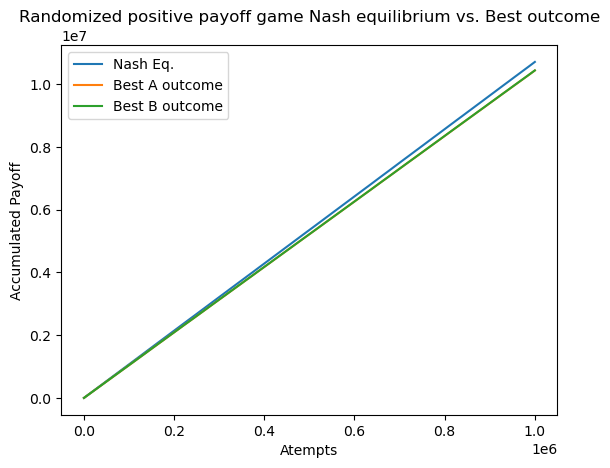

In [5]:
# Randomized positive payoff game Nash Equilibrium

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    numbers_for_a = randomize()
    numbers_for_b = randomize()
    n, a, b = find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Randomized positive payoff game Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.')
plt.plot(x, a_min, label = 'Best A outcome')
plt.plot(x, b_min, label = 'Best B outcome')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()

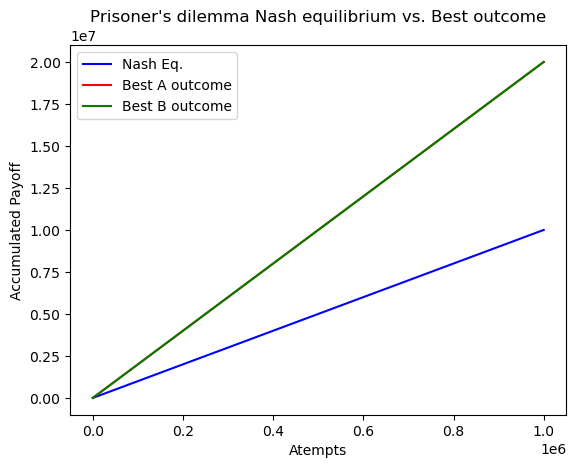

In [6]:
# Negative payoff game Nash Equilibrium Prisoner's dilemma

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    nums_for_a = [5, 20, 0, 1]
    nums_for_b = [5, 0, 20, 1]
    n, a, b = find_negative_payoff_nash_equilibrium(nums_for_a, nums_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Prisoner's dilemma Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.', color= 'b')
plt.plot(x, a_min, label = 'Best A outcome', color = 'r')
plt.plot(x, b_min, label = 'Best B outcome', color = 'g')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()


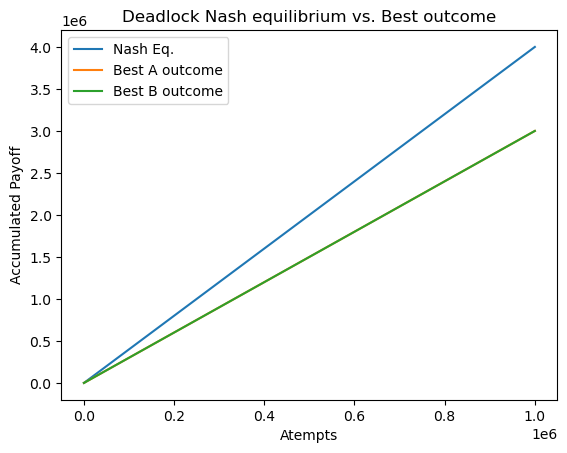

In [7]:
# Positive payoff game Deadlock 

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    numbers_for_a = [1, 3, 0, 2]
    numbers_for_b = [1, 0, 3, 2]
    n, a, b = find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Deadlock Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.')
plt.plot(x, a_min, label = 'Best A outcome')
plt.plot(x, b_min, label = 'Best B outcome')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()

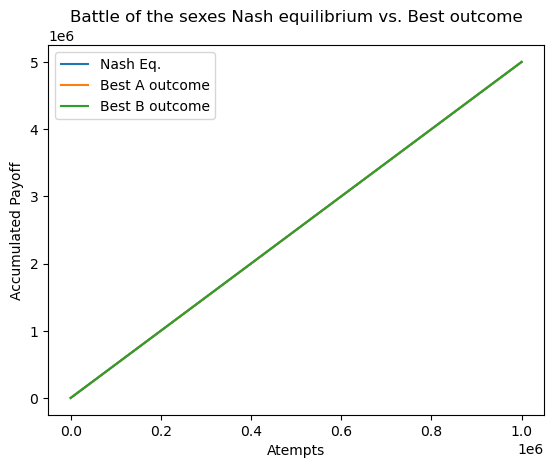

In [8]:
# Positive payoff game Nash Equilibrium Battle of the sexes

nash_eq = []
a_min = []
b_min = []
n_temp = 0
a_temp = 0
b_temp = 0
for i in range(1_000_000):
    numbers_for_a = [2, 1, 1, 3]
    numbers_for_b = [3, 1, 1, 2]
    n, a, b = find_positive_payoff_nash_equilibrium(numbers_for_a, numbers_for_b)
    n_temp += n
    a_temp += a
    b_temp += b
    nash_eq.append(n_temp)
    a_min.append(a_temp)
    b_min.append(b_temp)
x = list(range(1, len(nash_eq) + 1))
plt.title("Battle of the sexes Nash equilibrium vs. Best outcome")
plt.plot(x, nash_eq, label = 'Nash Eq.')
plt.plot(x, a_min, label = 'Best A outcome')
plt.plot(x, b_min, label = 'Best B outcome')
plt.legend()
plt.xlabel('Atempts')
plt.ylabel('Accumulated Payoff')
plt.show()

### 8. Result Analysis and comparison with Alternative Strategies:
#### Comparison of Nash equilibrium strategies with alternative approaches in non-zero-sum games.
For the observed resulsts of the experiment the following conclusions can be made:
1. In the first example, the random-generated-payoff game, after 200,000 iterations the discrepancy between NE and BR gradually starts growing and nearing 1,000,000 iterations it becomes significant;
2. For the Prisoner's Dilemma, the significant superiority of the NE strategy over BR is evident from the beginning, with a linear dependency (NE is two times less than BR). Additionally, it's observed that BR grows two times faster than NE, resulting in the cumulative sum of BR being double that of NE;
3. Deadlock, being the reverse version of the Prisoner's Dilemma, shows similar results, with the difference being that this time, NE grows much faster than BR because it's a positive payoff game;
4. In the Battle of the Sexes, the NE payoff vector perfectly coincides with the BR payoff vector, as both parties' best response is to go together to either event. This is evident from the graph, which shows that all three strategies have the same common payoff.

### 9. Implications for Strategic Decision Making:
#### Insights into the practical implications of Nash equilibrium in real-world competitive environments.
Nash equilibrium provides valuable insights into the dynamics of real-world competitive environments, offering decision-makers a framework for strategic analysis, planning, and decision-making. By leveraging these insights, decision-makers can navigate complex competitive landscapes more effectively and drive sustainable competitive advantage.
#### Recommendations for strategic decision-makers based on the project findings.
Overall, the project findings underscore the importance of strategic decision-making informed by game theory principles, with a focus on Nash equilibrium strategies for achieving competitive advantage in real-world environments. By understanding and leveraging these insights, decision-makers can enhance their strategic planning and drive success in competitive markets.

### 10. Conclusion and Future Directions:
#### Summary of key findings and conclusions drawn from the project.
The conducted experiment proves without doubt that for multiple iterations of a non-zero-sum competitive game, the Nash equilibrium strategy will provide superior or at least equivalent common payoff to the best outcome strategies or:

$$ \sum_{i=1}^{n} \text{CP}_{NE}i \geq \sum_{i=1}^{n} \text{CP}_{BR}i $$
Given the random nature of the first experiment the first few hundred iterations provide inconclusive results as there are certain scenarios in which a best response can be higher than Nash equilibrium when random payoff is assigned. After 200 000 iterations, the result is stabilized and is evident that in long term even with randomly assigned payoff values, NE is the superior strategy.
As Battle of Sexes is designed as a cooperative game, the BR and NE coinside by design. This simulation is included in the project for completeness and does not affect the overall results.<br><br>
These are insightful implications with real-world applications:

1. Marketing Strategies: Prioritizing efforts to expand the market size rather than solely focusing on increasing market share can lead to more sustainable growth. Strategies that foster market expansion create opportunities for all competitors and contribute to the overall growth of the industry, whereas strategies aimed solely at dominating the market share may lead to a stagnant or shrinking market in the long term.

2. Political Coalitions: Political parties forming coalitions based on popular interest rather than solely pursuing their own agendas can lead to more effective governance and representation. By prioritizing collaboration and compromise, parties can address the diverse needs and preferences of the electorate, fostering stability and progress in government.

3. Salary Negotiations: Employer-employee salary negotiations that prioritize work-life balance, hybrid or work-from-home policies, or enhanced benefits over higher base salaries can lead to greater employee satisfaction and retention. Investing in employee well-being and flexibility can result in a more motivated and productive workforce, ultimately benefiting both employers and employees in the long run.

By considering these implications in real-life scenarios, businesses, organizations, and policymakers can make informed decisions that promote long-term sustainability, collaboration, and well-being.

#### Suggestions for future research directions and potential areas of exploration in non-zero-sum game theory.
Game theorists have found that in some cases, Nash equilibrium makes invalid predictions or fails to provide a unique prediction. To address this, many solution concepts, or refinements of Nash equilibria, have been proposed to rule out implausible outcomes. For example, in 1965, Reinhard Selten introduced subgame perfect equilibrium to eliminate equilibria based on non-credible threats. Other extensions of Nash equilibrium address repeated games or games played without complete information. Despite these refinements, the core insight of Nash's concept remains: an equilibrium is a set of strategies where each player's strategy is optimal given the others' choices. A future project can cover these strategies and make comparisons with Nash equilibrium strategies. <br><br>
In light of the recent rapid increase in numbers of various implementations of Artificial Intelligence and its increasing significance in various technologies, future research could explore the potential implementation of an AI-based decision-making algorithm. Such an algorithm would be capable of analyzing the payoff matrix of a given situation and providing predictions for the most mutually-beneficial solution.

### References

Encyclopædia Britannica, Inc. Corporate Site.,2024; Game theory. Available at:<br>
https://www.britannica.com/science/game-theory (Accessed: 01 June 2024). <br>
<br>
Encyclopædia Britannica, Inc. Corporate Site.,2024; Nash equilibrium. Available at:<br>
https://www.britannica.com/science/Nash-equilibrium (Accessed: 01 June 2024). <br>
<br>
Conrad Kosowsky, 2023; Nash Equilibrium Existence without Convexity. Available at:<br>
https://paperswithcode.com/paper/nash-equilibrium-existence-without-convexity (Accessed: 01 June 2024).<br>
<br>
Janet Chen, Su-I Lu, Dan Vekhter, 1999; Game Theory. Available at:<br>
https://cs.stanford.edu/people/eroberts/courses/soco/projects/1998-99/game-theory/index.html (Accessed: 01 June 2024).<br>
<br>
The Nobel Price, 2024; Nobel price winners in economic sciense 1901-2023. Available at:<br>
https://www.nobelprize.org/prizes/lists/all-prizes-in-economic-sciences/all/ (Accessed: 07 June 2024).<br>